<a href="https://colab.research.google.com/github/MartinSomsak00/MLF/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adadelta
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()

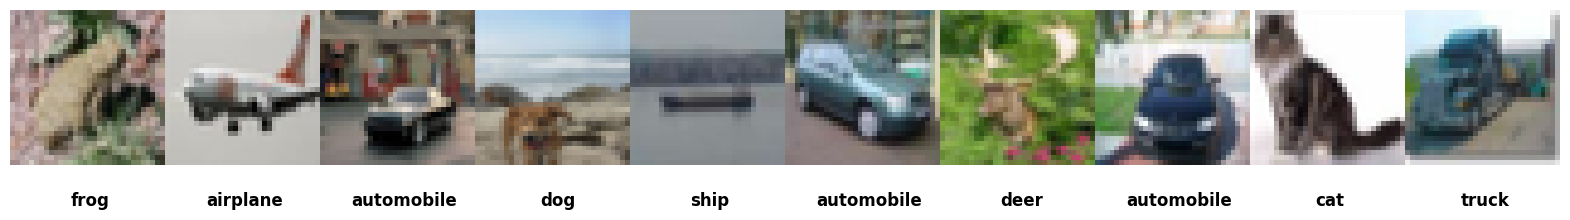

In [5]:
display_random_images(X_train, y_train)

In [6]:
#check the shape of image dataset

X_train.shape

(50000, 32, 32, 3)

In [7]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 640x480 with 0 Axes>

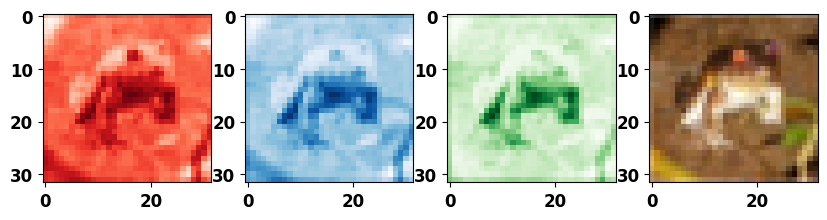

In [8]:
display_channels_separately(X_train[0])

In [9]:
X_train_scaled = X_train.astype('float32') / 255.0

In [10]:
y_train_encoded = to_categorical(y_train, num_classes=10)

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='selu'))
model.add(Dense(256, activation='selu', kernel_regularizer=regularizers.L2(0.05)))
model.add(Dense(128, activation='selu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952,458 (3.63 MB)

 Trainable params: 952,458 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
optimizer = Adam(learning_rate = 0.0005)
model.compile(loss='kl_divergence', optimizer=optimizer, metrics=['accuracy'])

In [14]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=120, batch_size=128, validation_split = 0.1)

Epoch 1/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.2372 - loss: 10.9729 - val_accuracy: 0.3668 - val_loss: 3.4426
Epoch 2/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3675 - loss: 2.8604 - val_accuracy: 0.4056 - val_loss: 1.9736
Epoch 3/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.4014 - loss: 1.8694 - val_accuracy: 0.4126 - val_loss: 1.7333
Epoch 4/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4119 - loss: 1.7175 - val_accuracy: 0.4326 - val_loss: 1.6498
Epoch 5/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.4306 - loss: 1.6368 - val_accuracy: 0.4388 - val_loss: 1.6224
Epoch 6/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4492 - loss: 1.5901 - val_accuracy: 0.4540 - val_loss: 1.5728
Epoch 7/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4510 - loss: 1.5799 - val_accuracy: 0.4412 - val_loss: 1.5982
Epoch 8/120
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4651 - loss: 1

In [15]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [16]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.7818708419799805
Test accuracy: 54.61000204086304 %


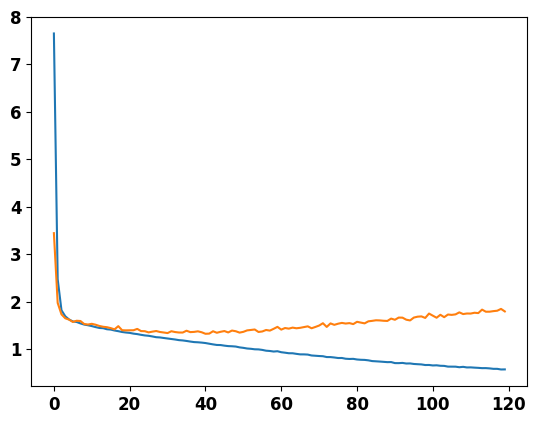

In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

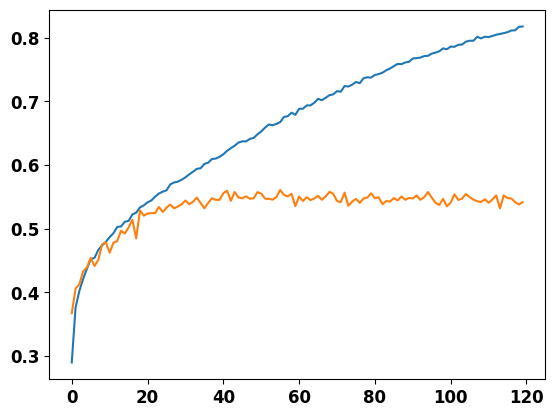

In [18]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


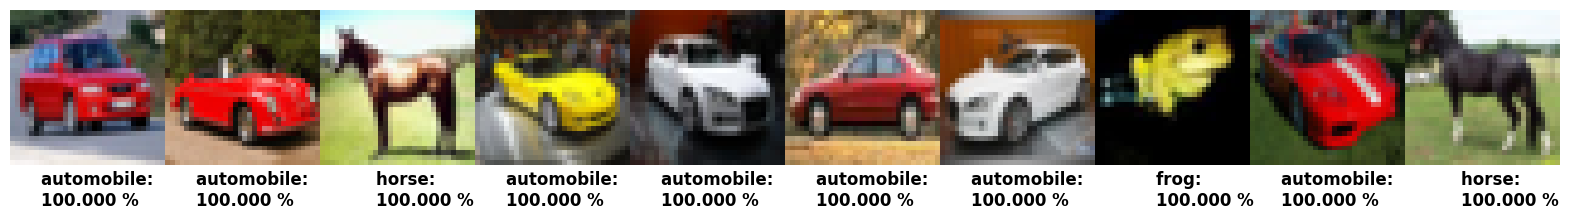

In [20]:
show_the_best_predictions(model, X_test, y_test)

The model architecture was revised to include 256 neurons with a dropout rate of 10%, followed by two additional layers of 256 neurons, one with an L2 regularizer, and a final layer of 128 neurons, all activated using SELU. Increasing the number of layers or neurons did not significantly enhance validation accuracy. Switching the activation function from 'sigmoid' to 'selu' and reducing the learning rate to 0.0005 improved validation accuracy, while using the Adam optimizer led to notable performance gains. Varying the batch size had minimal impact, and the original size of 128 was retained. Extending training to 120 epochs improved accuracy, but additional dropout layers and L1 regularization did not yield benefits. The highest validation accuracy reached was approximately 55%, with a final test accuracy of 54.2%, likely constrained by the 32x32 image resolution.